# Question 3: Logistic Regression

In [1]:
#Import all the required libraries
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 6.0)
from mpl_toolkits.mplot3d import Axes3D
import time
import math

## Load the data

In [2]:
# load the data
class0 = pd.read_csv('class0-input.csv').values
class1 = pd.read_csv('class1-input.csv').values
labels = pd.read_csv('labels.csv').values
# Perform important operations on the data
# Cast dataset into matrices and vectors 
bias = np.ones((10000,1))
X = np.concatenate((class0,class1))
X = np.concatenate((bias,X),axis=1)
Y = np.array(labels)

## Check the shape

In [3]:
# Shape of X
print(np.shape(X))
# Shape of Y
print(np.shape(Y))

(10000, 3)
(10000, 1)


## Visualize the data

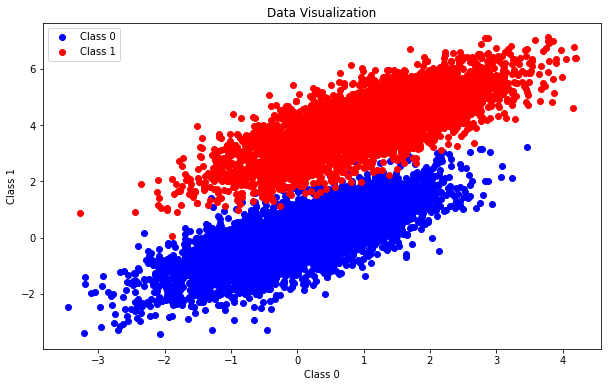

In [4]:
# Use different colors for each class
plt.scatter(X[0:5000,1],X[0:5000,2],c = 'b',label = 'Class 0')
plt.scatter(X[5000:10000,1],X[5000:10000,2],c = 'r',label = 'Class 1')
# Dont forget to add axes titles, graph title, legend

plt.xlabel('Class 0')
plt.ylabel('Class 1')
plt.title('Data Visualization')
plt.legend()

## Define the required functions

In [5]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [6]:
# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(X, Y, y_pred):
    N = X.shape[0]
    # we use y_pred here since it is the sigmoid of X and the weights
    grad = -np.dot(X.T,Y - y_pred)/N
    return grad   

In [7]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    newweights = prev_weights-current_grads*learning_rate
    return newweights

In [8]:
# Use the implemented functions in the main function
# 'main' fucntion should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weigths randomly
initial_weights = np.random.random((3,1))
def main(X, Y, weights, learning_rate = 0.0005, num_steps = 500000):
    for i in range(num_steps):
        y_pred = predict(X,weights)
        current_grads = calculate_gradients(X,Y,y_pred)
        weights = update_weights(weights,current_grads,learning_rate)
        
    return(weights)

In [9]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

In [10]:
# Use the final weights to perform prediction using predict funtion
final_weights = main(X,Y,initial_weights)
Y_predict = predict(X, final_weights)[:,0]
Y_predict[np.where(Y_predict >= 0.5)] = 1
Y_predict[np.where(Y_predict < 0.5)] = 0 

# print accuracy
count = 0
for i in range(Y_predict.shape[0]):
    count += int(Y_predict[i] == Y[i])
print("Accuracy is %0.2f " %((float(count)/Y_predict.shape[0])*100))


Accuracy is 99.42 


## Visualize the misclassification

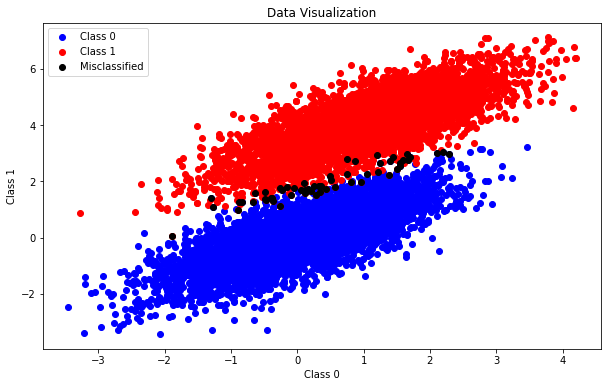

In [11]:
# Use different colors for class 0, class 1 and misclassified datapoints
mcd = []
for i in range(Y_predict.shape[0]):
    if Y_predict[i]-Y[i] != 0:
        mcd.append(X[i,1:])
mcd = np.array(mcd)

# Use plt.scatter
plt.scatter(X[0:5000,1],X[0:5000,2],c = 'b',label = 'Class 0')
plt.scatter(X[5000:10000,1],X[5000:10000,2],c = 'r',label = 'Class 1')
plt.scatter(mcd[:,0],mcd[:,1],c = 'black',label = 'Misclassified')
# Dont forget to add axes titles, graph title, legend
plt.xlabel('Class 0')
plt.ylabel('Class 1')
plt.title('Data Visualization')
plt.legend()

## Compare the results with sklearn's Logistic Regression

In [12]:
# import sklearn and necessary libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X[:,1:],Y.ravel())

sklearn_pred = logistic_regression.predict(X[:,1:])

sklearn_pred[np.where(sklearn_pred >= 0.5)] = 1
sklearn_pred[np.where(sklearn_pred < 0.5)] = 0 

# print accuracy
count = 0
for i in range(sklearn_pred.shape[0]):
    count += int(sklearn_pred[i] == Y[i])
print("Accuracy is %0.2f " %((float(count)/sklearn_pred.shape[0])*100))

Accuracy is 99.48 


sklearn's model accuracy is slightly higher (by about 0.06) than my model's accuracy. To improve accuracy, higher number of iterations can be used and a larger training data set can be used.